# Comparativo Série Histórica Dólar x IPCA

fontes:

_Dólar:_
https://br.investing.com/currencies/usd-brl-historical-data

_IPCA:_
https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%config InlineBackend.figure_format = 'retina'

In [263]:
import warnings
warnings.filterwarnings('ignore')

In [264]:
# Para ler o xls do IPCA
! pip install xlrd

## Como a planilha vem cheia de merges e com estrutura complexa, ajustamos...

In [265]:
df = pd.read_excel('ipca_202208SerieHist.xls')

In [266]:
c1 = df['Unnamed: 0'].isna() == False
c2 = df['Unnamed: 0'] != "SÉRIE HISTÓRICA DO IPCA"
df2= df[c1 & c2]

In [267]:
c1 = df['Unnamed: 1'].isna() == False
c2 = df['Unnamed: 0'] != "ANO"
df2 = df[c1 & c2]
df2.head(3)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
7,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
8,NaN,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
9,NaN,MAR,282.96,42.75,182.96,602.93,182.96,3417.39


In [268]:
NEW_COL_NAMES = ['ANO', 'MÊS', 'NÚMERO ÍNDICE', 'NO MÊS','3 MESES', '6 MESES', 'NO ANO', '12 MESES']

In [269]:
df2.columns = NEW_COL_NAMES

In [270]:
df_ipca = df2.fillna(method='ffill')

In [271]:
df_ipca.head(4)

,ANO,MÊS,NÚMERO ÍNDICE,NO MÊS,3 MESES,6 MESES,NO ANO,12 MESES
7,1994,JAN,141.31,41.31,162.13,533.33,41.31,2693.84
8,1994,FEV,198.22,40.27,171.24,568.17,98.22,3035.71
9,1994,MAR,282.96,42.75,182.96,602.93,182.96,3417.39
10,1994,ABR,403.73,42.68,185.71,648.92,303.73,3828.49


In [272]:
dict_test = {}

In [273]:
for index, value in enumerate(df_ipca['MÊS'].unique()):
    dict_test[value] = index + 1

In [274]:
df_ipca['MES_NUM'] = df_ipca['MÊS'].apply(lambda x : dict_test[x])

In [275]:
df_ipca['PRE_DATA'] = df_ipca.apply(lambda row : str(row['ANO']) + '/' + str(row['MES_NUM']) + '/' + '1', axis=1)

In [276]:
# Ajusta para Datetime
df_ipca['DATA'] = pd.to_datetime(df_ipca['PRE_DATA'])

In [277]:
import plotly.express as px

fig = px.line(df_ipca, x='DATA', y="NO MÊS", title='IPCA %')

fig.show()

# Vamos ao Dólar

In [278]:
df_dolar = pd.read_csv("USD_BRL Dados Históricos.csv", sep=',', decimal='.')

In [279]:
df_dolar.head(3)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,01.10.2022,"5,2055","5,4158","5,4158","5,1104",NaN,"-3,88%"
1,01.09.2022,"5,4154","5,1833","5,4300","5,0766",NaN,"4,48%"
2,01.08.2022,"5,1831","5,1759","5,3163","5,0076",NaN,"0,19%"


In [280]:
# Ajusta para Datetime
df_dolar['DATA'] = pd.to_datetime(df_dolar['Data'], format="%d.%m.%Y")

# Unindo ambas as informações em um único Dataframe

In [281]:
df_merged = df_dolar.merge(df_ipca, on="DATA", how='inner')

In [282]:
df_full = df_merged[['DATA', 'Último', 'NO MÊS']]

In [283]:
df_full.columns = ['Data', 'BRL_USD', 'IPCA_MES']

In [284]:
df_full['BRL_USD'] = df_full['BRL_USD'].apply(lambda x : float(x.replace(',', '.')))

# Plot da Série Histórica

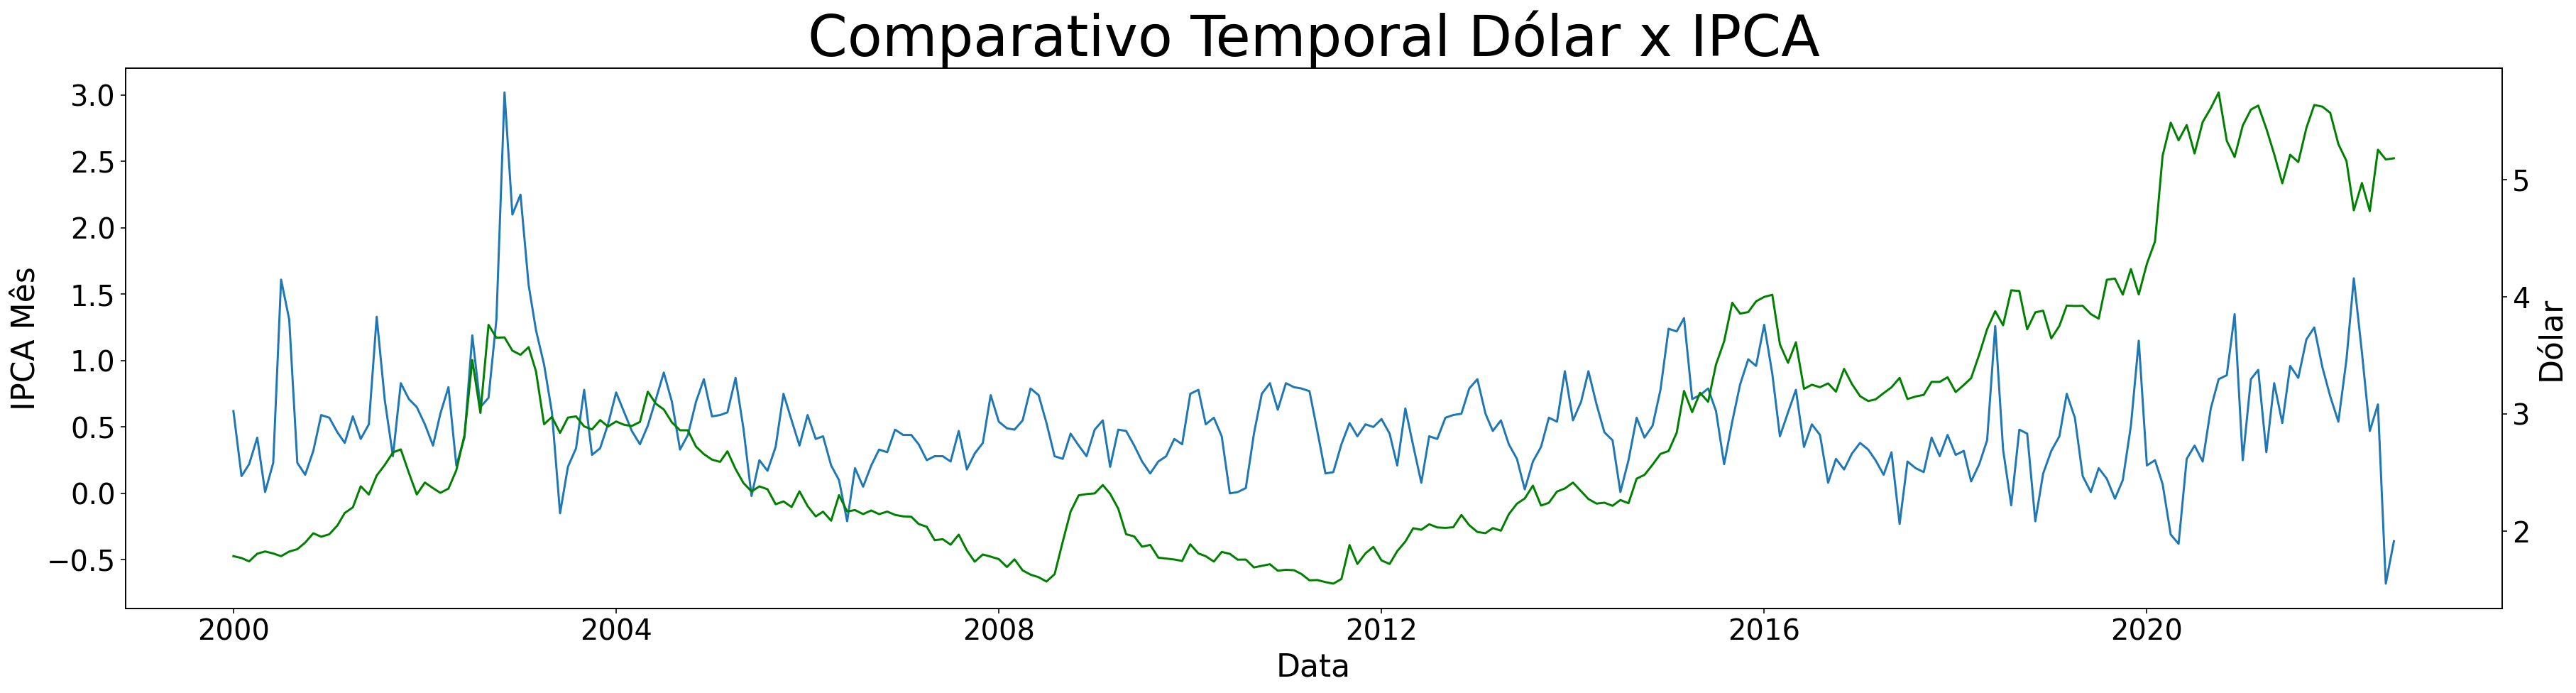

In [287]:
# # Para tirar a densidade do gráfico, exibe uma amostra de 10% do total
fig, ax = plt.subplots(ncols=1, figsize = (30,7))


# Caso desejado, filtrar a data de início do gráfico
DATA_CORTE = datetime(year=2000, month=1, day=1)
df_full_aux = df_full[df_full['Data'] >= DATA_CORTE]

sns.lineplot(data=df_full_aux, x='Data', y='IPCA_MES', ax=ax)
ax2 = ax.twinx()
sns.lineplot(data=df_full_aux, x='Data', y='BRL_USD', ax=ax2, color='green')

ax.set_ylabel('IPCA Mês', fontsize=22)
ax.set_xlabel('Data', fontsize=22)
ax.tick_params(axis='both', labelsize=20)

ax2.set_ylabel('Dólar', fontsize=22)
ax2.tick_params(axis='both', labelsize=20)
plt.title("Comparativo Temporal Dólar x IPCA", fontsize=40);

In [290]:
df_full[['BRL_USD', 'IPCA_MES']].corr()

,BRL_USD,IPCA_MES
BRL_USD,1.000000,-0.228323
IPCA_MES,-0.228323,1.000000
